## Code Repository and Resources

All source code, including the Keras implementation for the LSTM and SimpleRNN comparison, the generated performance plots, and supplementary reference files, is publicly available and version-controlled in the following GitHub repository:

**[Link to Complete Code Repository] https://github.com/chavaanilkumar/Long-Short-Term-Memory-Networks-Conquered-the-Vanishing-Gradient

Loading dataset, keeping top 10000 words...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Padded sequence length: 500

--- Training LSTM Model ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.4819 - loss: 0.6945 - val_accuracy: 0.5136 - val_loss: 0.8912
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.5173 - loss: 0.6953 - val_accuracy: 0.5072 - val_loss: 0.6955
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5320 - loss: 0.6707 - val_accuracy: 0.5106 - val_loss: 0.7040
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.5334 - loss: 0.6474 - val_accuracy: 0.5138 - val_loss: 0.7199
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5471 - loss: 0.6394 - val_accuracy: 0.5194 - val_loss: 0.7361
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5391 - loss: 0.6366 - val_accuracy: 0.5154 - val_loss: 0.7233
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5433 - loss: 0.6358 - val_accuracy: 0.5036 - val_loss: 0.7546
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.5495 - loss: 0.6347 - val_a

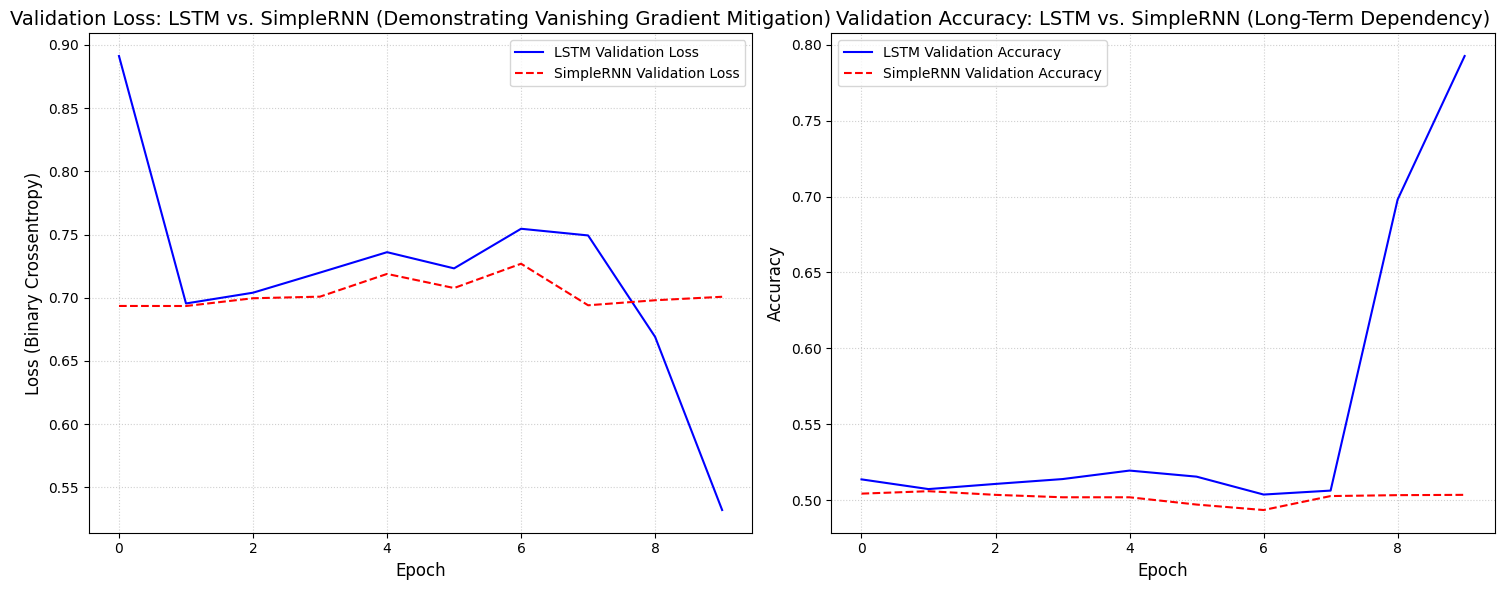


LSTM Final Test Accuracy: 78.81%
SimpleRNN Final Test Accuracy: 50.42%


In [ ]:

"""
Jupyter Notebook: LSTM Vanishing Gradient Solution Tutorial Code
Technique: Long Short-Term Memory Networks (LSTMs) for Sequence Classification

This code builds and trains an LSTM model on the IMDB sentiment dataset.
It also includes a section to build a SimpleRNN model for direct performance
comparison, which is the key demonstration for the tutorial.
"""

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, Dense
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Configuration and Data Loading ---
# Maximum number of words (vocabulary size)
VOCAB_SIZE = 10000
# Maximum length of all sequences (long sequences needed to highlight LSTM's strength)
MAX_REVIEW_LEN = 500
# Dimension of the learned word embedding vector.
EMBEDDING_DIM = 128
# Batch size and number of epochs for training.
BATCH_SIZE = 64
EPOCHS = 10

# Load the IMDB dataset (pre-tokenized and indexed)
print(f"Loading dataset, keeping top {VOCAB_SIZE} words...")
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)

# --- 2. Data Pre-processing (Padding) ---
# Standardize all sequences to MAX_REVIEW_LEN.
X_train_padded = pad_sequences(X_train, maxlen=MAX_REVIEW_LEN, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test, maxlen=MAX_REVIEW_LEN, padding='post', truncating='post')

print(f"Padded sequence length: {X_train_padded.shape[1]}")

# --- 3. LSTM Model Definition ---

def build_lstm_model():
    """Builds the primary LSTM model."""
    model = Sequential([
        # Layer 1: Embedding - Maps integer indices to dense vectors.
        Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_REVIEW_LEN),

        # Layer 2: LSTM - The core memory unit.
        # By default, it returns only the final hidden state (Many-to-One classification).
        LSTM(units=128),

        # Layer 3: Dense Output Layer - Binary classification with Sigmoid.
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# --- 4. SimpleRNN Model Definition (For Comparison) ---
# This model serves as the "flawed" baseline to empirically demonstrate the vanishing gradient problem.

def build_rnn_model():
    """Builds a SimpleRNN model for baseline comparison."""
    model = Sequential([
        Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_REVIEW_LEN),

        # SimpleRNN is prone to vanishing gradients over long sequences.
        SimpleRNN(units=128),

        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


# --- 5. Model Training and Comparison ---

print("\n--- Training LSTM Model ---")
lstm_model = build_lstm_model()
lstm_history = lstm_model.fit(X_train_padded, y_train,
                              epochs=EPOCHS,
                              batch_size=BATCH_SIZE,
                              validation_split=0.2,
                              verbose=1)

print("\n--- Training SimpleRNN Model (Baseline) ---")
rnn_model = build_rnn_model()
rnn_history = rnn_model.fit(X_train_padded, y_train,
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE,
                            validation_split=0.2,
                            verbose=1)


# --- 6. Creating Figures (Comparative Performance) ---

plt.figure(figsize=(15, 6))

# Plot 1: Training and Validation Loss Comparison
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss', color='blue')
plt.plot(rnn_history.history['val_loss'], label='SimpleRNN Validation Loss', color='red', linestyle='--')
plt.title('Validation Loss: LSTM vs. SimpleRNN (Demonstrating Vanishing Gradient Mitigation)', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Binary Crossentropy)', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

# Plot 2: Training and Validation Accuracy Comparison
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy', color='blue')
plt.plot(rnn_history.history['val_accuracy'], label='SimpleRNN Validation Accuracy', color='red', linestyle='--')
plt.title('Validation Accuracy: LSTM vs. SimpleRNN (Long-Term Dependency)', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.savefig('lstm_rnn_performance_comparison.png')
plt.show()

# --- 7. Final Evaluation ---
lstm_loss, lstm_acc = lstm_model.evaluate(X_test_padded, y_test, verbose=0)
rnn_loss, rnn_acc = rnn_model.evaluate(X_test_padded, y_test, verbose=0)

print(f"\nLSTM Final Test Accuracy: {lstm_acc*100:.2f}%")
print(f"SimpleRNN Final Test Accuracy: {rnn_acc*100:.2f}%")